In [42]:
import matplotlib.pyplot as plt
import sys, os
import h5py
import math
sys.path.append('/Users/maturino/jaxions/jaxions/scripts/')
import numpy as np
from pyaxions import jaxions as pa
import importlib

In [76]:
importlib.reload(pa)

<module 'pyaxions.jaxions' from '/Users/maturino/jaxions/jaxions/scripts/pyaxions/jaxions.py'>

In [77]:
cd ../drac/

/Users/maturino/jaxions/data/drac


In [78]:
dirlist=next(os.walk('.'))[1]
print(dirlist)

['out_L4N2_00', 'out_L4N2_01', 'out_L4N2_02', 'out_L4N2_03', 'out_L4N2_05', 'out_L4N2_06', 'out_L6N3_00', 'out_L6N3_01', 'out_L6N3_02', 'out_L6N3_03', 'out_L6N3_04', 'out_L6N3_05', 'out_L6N3_06', 'out_L6N3_07']


In [79]:
d = 0
print(dirlist[d])
#pa.mv10001(dirlist[d])
mdir = pa.findmdir(dirlist[d])
mfiles = pa.findmfiles(mdir)

out_L4N2_00


In [47]:
fil = mfiles[-1]
pa.aximcontent(fil)

Attributes of file  <HDF5 file "axion.m.00114" (mode r)>
Field type: b'Axion'
Precision: b'Single'
Size: 2048
Depth: 2048
Lambda: 294912.0
Lambda type: b'z2'
Saxion mass: 1.5
Axion mass: 529.089784441
nQcd: 7.0
Physical size: 4.0
z: 6.0
zInitial: 0.1
zFinal: 4.5
nSteps: 20000
Current step: 5700


In [48]:
f = h5py.File(fil, 'r')
list(f)

['bins', 'energy', 'nSpectrum', 'pSpectrum']

In [49]:
conta = pa.conbin(fil,10)

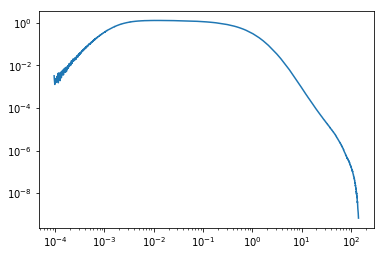

In [50]:
plt.clf()
plt.loglog(conta[:,0],conta[:,1])
plt.show()

In [51]:
# compare before and after WKB
filE = mfiles[-3]
filW = mfiles[-1]
print(pa.gm(filE,'ct'),pa.gm(filW,'ct'))

4.50015708319 6.0


In [52]:
conE = pa.conbin(filE,100)
conW = pa.conbin(filW,100)

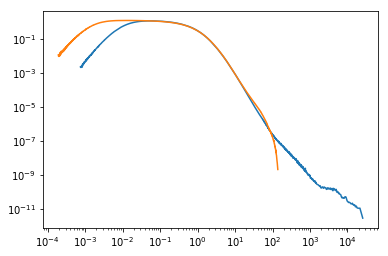

In [53]:
plt.loglog(conE[:,0],conE[:,1])
plt.loglog(conW[:,0],conW[:,1])
plt.show()

In [54]:
facto=(pa.gm(filW,'ct')/pa.gm(filE,'ct'))
susfacto=facto**(1-pa.gm(filE,'nqcd')/2)
print(susfacto)
print(pa.gm(filE,'eA'), pa.gm(filW,'eA'),pa.gm(filW,'eA')*susfacto)

0.487181802628
342.953036111 691.163965991 336.722506863


In [55]:
# Evolution of high contrast
from scipy.interpolate import interp1d

In [56]:
pa.gm(mfiles[-1],"ftype")

'Axion'

In [57]:
conlist = []
zlist = []
for f in mfiles : 
    if pa.gm(f,'ftype') == 'Axion':
        zlist.append(pa.gm(f,'ct')) 
        conlist.append(pa.conbin(f,100))     

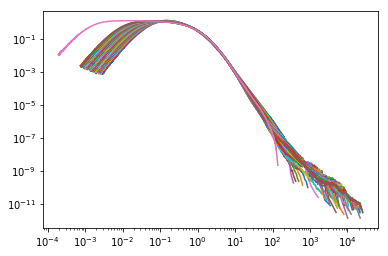

In [58]:
for i in range(len(conlist)):
    plt.loglog(conlist[i][:,0],conlist[i][:,1])
plt.show()

In [59]:
ctab = np.linspace(0, 3, 10)
print('max in last file (wkbed)',max(conlist[-1][:,0]))

# create interpolation for the evolution

inlis = []
for i in range(len(conlist)):
    inte = interp1d(np.log10(conlist[i][:,0]),np.log10(conlist[i][:,1]),kind='cubic',fill_value='extrapolate')
    inlis.append(inte(ctab))
zarr  = np.array(zlist)
carr = np.array(inlis)

max in last file (wkbed) 138.291320158


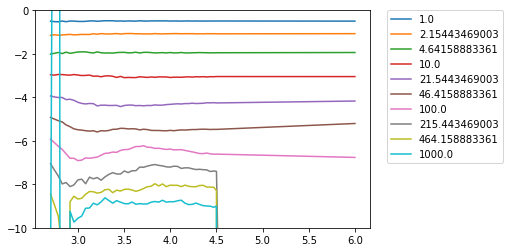

In [60]:
for cc in range(0,len(ctab)):
    plt.plot(zarr[:],carr[:,cc],label=10**ctab[cc])
plt.ylim([-10,0])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [61]:
stringo = []
zlist = []
for f in mfiles: 
    if pa.gm(f,'ftype') == 'Saxion':
        zlist.append(pa.gm(f,'ct'))
        stringo.append(pa.gm(f,'stDens'))

[gm] No string info in the file! Use 0.


In [62]:
stringo = pa.stringo(mfiles)

[gm] No string info in the file! Use 0.


In [63]:
print(len(zlist),len(stringo))

67 67


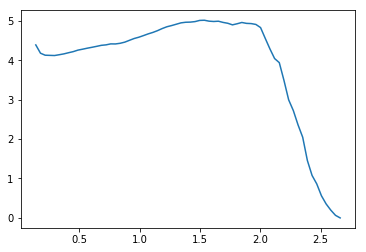

In [64]:
plt.plot(stringo[1:,0],stringo[1:,1])
plt.show()

In [80]:
dirlist

['out_L4N2_00',
 'out_L4N2_01',
 'out_L4N2_02',
 'out_L4N2_03',
 'out_L4N2_05',
 'out_L4N2_06',
 'out_L6N3_00',
 'out_L6N3_01',
 'out_L6N3_02',
 'out_L6N3_03',
 'out_L6N3_04',
 'out_L6N3_05',
 'out_L6N3_06',
 'out_L6N3_07']

In [81]:
al_stringo = []
seldir = dirlist
print(seldir)

for dir in seldir:
    mdir = pa.findmdir(dir)
    mfiles = pa.findmfiles(mdir)
    print(dir)
    al_stringo.append(pa.stringo(mfiles))

['out_L4N2_00', 'out_L4N2_01', 'out_L4N2_02', 'out_L4N2_03', 'out_L4N2_05', 'out_L4N2_06', 'out_L6N3_00', 'out_L6N3_01', 'out_L6N3_02', 'out_L6N3_03', 'out_L6N3_04', 'out_L6N3_05', 'out_L6N3_06', 'out_L6N3_07']
out_L4N2_00
[gm] No string info in the file! Use 0.
out_L4N2_01
[gm] No string info in the file! Use 0.
out_L4N2_02
[gm] No string info in the file! Use 0.
out_L4N2_03
[gm] No string info in the file! Use 0.
out_L4N2_05
[gm] No string info in the file! Use 0.
out_L4N2_06
[gm] No string info in the file! Use 0.
out_L6N3_00
[gm] No string info in the file! Use 0.
out_L6N3_01
[gm] No string info in the file! Use 0.
out_L6N3_02
[gm] No string info in the file! Use 0.
out_L6N3_03
[gm] No string info in the file! Use 0.
out_L6N3_04
[gm] No string info in the file! Use 0.
out_L6N3_05
[gm] No string info in the file! Use 0.
out_L6N3_06
[gm] No string info in the file! Use 0.
out_L6N3_07
[gm] No string info in the file! Use 0.


out_L4N2_00/m/ 2048 4.0 N=2048 L=4.000000
out_L4N2_01/m/ 2048 4.0 N=2048 L=4.000000
out_L4N2_02/m/ 2048 4.0 N=2048 L=4.000000
out_L4N2_03/m/ 2048 4.0 N=2048 L=4.000000
out_L4N2_05/m/ 2048 4.0 N=2048 L=4.000000
out_L4N2_06/m/ 2048 4.0 N=2048 L=4.000000
out_L6N3_00/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_01/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_02/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_03/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_04/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_05/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_06/m/ 3072 6.0 N=3072 L=6.000000
out_L6N3_07/m/ 3072 6.0 N=3072 L=6.000000


/Users/maturino/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


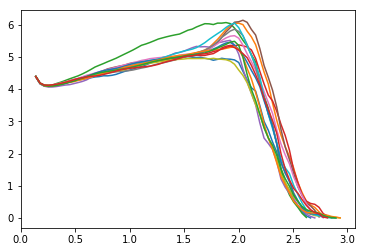

In [82]:
for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)
    onefile = mfiles[0]
    N = pa.gm(onefile,'Size')
    L = pa.gm(onefile,'L')
    print(mdir,N,L,'N=%d L=%f'%(N,L))
    plt.plot(al_stringo[s][1:,0],al_stringo[s][1:,1])
plt.legend()
plt.show()

In [83]:
seldir[0]

'out_L4N2_00'

In [84]:
mdir = pa.findmdir(seldir[2])
mfiles = pa.findmfiles(mdir)
onefile = mfiles[0]
delta = pa.gm(onefile,'delta')
L3 = pa.gm(onefile,'L')**3
print(mdir, onefile,delta,L3)
odir = mdir[:-2]
fina = odir+'./sample.txt'

ztab1, Thtab1, Rhtab1, VThtab1, stringo2, ztab2, Thtab2, VThtab2 = pa.axev(seldir[2])



out_L4N2_02/m/ out_L4N2_02/m/axion.m.00000 0.001953125 64.0
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)


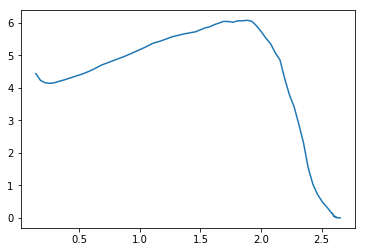

In [85]:
plt.plot(stringo2[1:,0],stringo2[1:,1]*(stringo2[1:,0]**2)*(3/4)*delta/L3)
plt.show()

Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab1, Rhtab1, VThtab1, stringo, ztab2, Thtab2, VThtab2)
Saxion + Axion (ztab1, Thtab

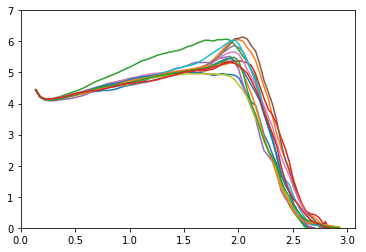

In [86]:
al_stringo2 = []
for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)
    onefile = mfiles[-2]
    delta = pa.gm(onefile,'delta')
    L3 = pa.gm(onefile,'L')**3
    #print(mdir, onefile,delta,L3)
    odir = mdir[:-2]
    fina = odir+'./sample.txt'
    if (pa.gm(onefile,'ftype')=='Axion'):
        ztab1, Thtab1, Rhtab1, VThtab1, stringo2, ztab2, Thtab2, VThtab2 = pa.axev(seldir[s])
        plt.plot(stringo2[1:,0],stringo2[1:,1]*(stringo2[1:,0]**2)*(3/4)*delta/L3)
plt.ylim([0,7])
plt.show()

In [87]:
# power spectrum

In [88]:
nmodes2048 = pa.phasespacedensityBOX(2048)
nmodes3072 = pa.phasespacedensityBOX(3072)
nmodes4096 = pa.phasespacedensityBOX(4096)

28
28
28


In [73]:
al_stringo = []
seldir = dirlist
print(seldir)

for dir in seldir:
    mdir = pa.findmdir(dir)
    mfiles = pa.findmfiles(mdir)
    print(dir)
    al_stringo.append(pa.stringo(mfiles))

['out_L4N2_00', 'out_L4N2_01', 'out_L4N2_02', 'out_L4N2_03', 'out_L4N2_05', 'out_L4N2_06', 'out_L6N3_00', 'out_L6N3_01', 'out_L6N3_02', 'out_L6N3_03', 'out_L6N3_04', 'out_L6N3_05', 'out_L6N3_06', 'out_L6N3_07']
out_L4N2_00
[gm] No string info in the file! Use 0.
out_L4N2_01
[gm] No string info in the file! Use 0.
out_L4N2_02
[gm] No string info in the file! Use 0.
out_L4N2_03
[gm] No string info in the file! Use 0.
out_L4N2_05
[gm] No string info in the file! Use 0.
out_L4N2_06
[gm] No string info in the file! Use 0.
out_L6N3_00
[gm] No string info in the file! Use 0.
out_L6N3_01
[gm] No string info in the file! Use 0.
out_L6N3_02
[gm] No string info in the file! Use 0.
out_L6N3_03
[gm] No string info in the file! Use 0.
out_L6N3_04
[gm] No string info in the file! Use 0.
out_L6N3_05
[gm] No string info in the file! Use 0.
out_L6N3_06
[gm] No string info in the file! Use 0.
out_L6N3_07
[gm] No string info in the file! Use 0.


out_L4N2_00/m/axion.m.00112
out_L4N2_01/m/axion.m.00113
out_L4N2_02/m/axion.m.00112
out_L4N2_03/m/axion.m.00113
out_L4N2_05/m/axion.m.00112
out_L4N2_06/m/axion.m.00113
out_L6N3_00/m/axion.m.00112
out_L6N3_01/m/axion.m.00113
out_L6N3_02/m/axion.m.00113
out_L6N3_03/m/axion.m.00113
out_L6N3_04/m/axion.m.00113
out_L6N3_05/m/axion.m.00113
out_L6N3_06/m/axion.m.00113
out_L6N3_07/m/axion.m.00113

/Users/maturino/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


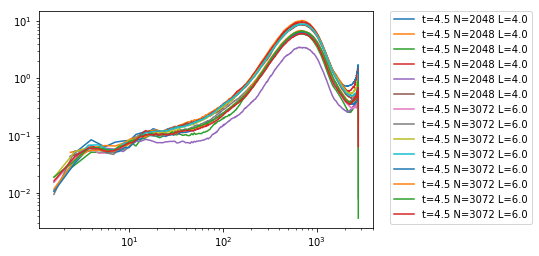

In [89]:
# divide in three sizes 
ps2list = []
ps3list = []
ps4list = []


for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)   
    finalfile = mfiles[-2]
    print(finalfile)
    N = pa.gm(finalfile,'Size')
    L = pa.gm(finalfile,'L')
    ct= pa.gm(finalfile,'ct')
    avdens = pa.gm(finalfile,'eA')
    psparr = pa.gm(finalfile,'psp')
    if psparr != None:
        if (N == 2048):
            dimensionlessvariance = pa.normalisePspectrum(psparr,nmodes2048,avdens,2048,L)
            kmax = len(nmodes2048)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,dimensionlessvariance,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 3072):
            dimensionlessvariance = pa.normalisePspectrum(psparr,nmodes3072,avdens,3072,L)
            kmax = len(nmodes3072)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,dimensionlessvariance,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 4096):
            dimensionlessvariance = pa.normalisePspectrum(psparr,nmodes4096,avdens,4096,L)
            kmax = len(nmodes4096)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,dimensionlessvariance,label='t=%.1f N=%d L=%.1f'%(ct,N,L))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

out_L4N2_00/m/axion.m.00114
out_L4N2_01/m/axion.m.00115
out_L4N2_02/m/axion.m.00114
out_L4N2_03/m/axion.m.00115
out_L4N2_05/m/axion.m.00114
out_L4N2_06/m/axion.m.00115
out_L6N3_00/m/axion.m.00114
out_L6N3_01/m/axion.m.00115
out_L6N3_02/m/axion.m.00115
out_L6N3_03/m/axion.m.00115
out_L6N3_04/m/axion.m.00115
out_L6N3_05/m/axion.m.00115
out_L6N3_06/m/axion.m.00115
out_L6N3_07/m/axion.m.00115


/Users/maturino/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


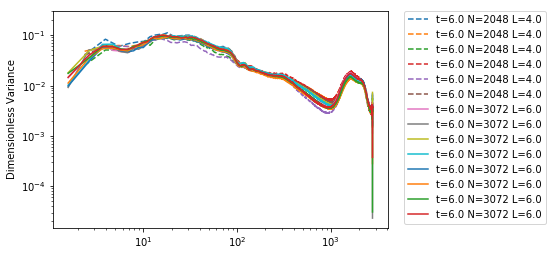

In [90]:
# divide in three sizes 
ps2list = []
ps3list = []
ps4list = []


for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)   
    finalfile = mfiles[-1]
    print(finalfile)
    N = pa.gm(finalfile,'Size')
    L = pa.gm(finalfile,'L')
    ct= pa.gm(finalfile,'ct')
    avdens = pa.gm(finalfile,'eA')
    psparr = pa.gm(finalfile,'psp')
    if psparr != None:
        if (N == 2048):
            dimensionlessvariance = pa.normalisePspectrum(psparr,nmodes2048,avdens,2048,L)
            kmax = len(nmodes2048)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,dimensionlessvariance,'--',label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 3072):
            dimensionlessvariance = pa.normalisePspectrum(psparr,nmodes3072,avdens,3072,L)
            kmax = len(nmodes3072)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,dimensionlessvariance,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 4096):
            dimensionlessvariance = pa.normalisePspectrum(psparr,nmodes4096,avdens,4096,L)
            kmax = len(nmodes4096)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,dimensionlessvariance,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
plt.ylabel('Dimensionless Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

out_L4N2_00/m/axion.m.00112
out_L4N2_01/m/axion.m.00113
out_L4N2_02/m/axion.m.00112
out_L4N2_03/m/axion.m.00113
out_L4N2_05/m/axion.m.00112
out_L4N2_06/m/axion.m.00113
out_L6N3_00/m/axion.m.00112
out_L6N3_01/m/axion.m.00113
out_L6N3_02/m/axion.m.00113
out_L6N3_03/m/axion.m.00113
out_L6N3_04/m/axion.m.00113
out_L6N3_05/m/axion.m.00113
out_L6N3_06/m/axion.m.00113
out_L6N3_07/m/axion.m.00113

/Users/maturino/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


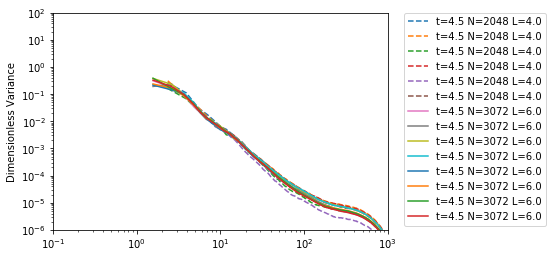

In [99]:
# divide in three sizes 
ps2list = []
ps3list = []
ps4list = []


for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)   
    finalfile = mfiles[-2]
    print(finalfile)
    N = pa.gm(finalfile,'Size')
    L = pa.gm(finalfile,'L')
    ct= pa.gm(finalfile,'ct')
    avdens = pa.gm(finalfile,'eA')
    psparr = pa.gm(finalfile,'psp')
    if psparr != None:
        if (N == 2048):
            powerspec = psparr/(nmodes2048*avdens**2)
            kmax = len(nmodes2048)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,powerspec,'--',label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 3072):
            powerspec = psparr/(nmodes3072*avdens**2)
            kmax = len(nmodes3072)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,powerspec,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 4096):
            powerspec = psparr/(nmodes4096*avdens**2)
            kmax = len(nmodes4096)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            klist[0]=0
            plt.loglog(klist,powerspec,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
plt.ylabel('Dimensionless Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.000001,100])
plt.xlim([0.1,1000])
plt.show()


In [93]:
# Average energy density in MISalignment Units

sum = 0
for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)   
    finalfile = mfiles[-1]
    eA = pa.gm(finalfile,'eA')
    ct = pa.gm(finalfile,'ct')
    nqcd = pa.gm(finalfile,'nqcd')
    print("FILE=%s   ct = %.2f"%(finalfile,ct))
    sum += eA
sum=sum/len(seldir)
print(sum/8,sum*ct**(1-nqcd/2)/(16.82))

FILE=out_L4N2_00/m/axion.m.00114   ct = 6.00
FILE=out_L4N2_01/m/axion.m.00115   ct = 6.00
FILE=out_L4N2_02/m/axion.m.00114   ct = 6.00
FILE=out_L4N2_03/m/axion.m.00115   ct = 6.00
FILE=out_L4N2_05/m/axion.m.00114   ct = 6.00
FILE=out_L4N2_06/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_00/m/axion.m.00114   ct = 6.00
FILE=out_L6N3_01/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_02/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_03/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_04/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_05/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_06/m/axion.m.00115   ct = 6.00
FILE=out_L6N3_07/m/axion.m.00115   ct = 6.00
89.8997941881 0.484891495447


out_L4N2_00/m/axion.m.00104
out_L4N2_01/m/axion.m.00105
out_L4N2_02/m/axion.m.00104
out_L4N2_03/m/axion.m.00105
out_L4N2_05/m/axion.m.00104
out_L4N2_06/m/axion.m.00105
out_L6N3_00/m/axion.m.00104
out_L6N3_01/m/axion.m.00105
out_L6N3_02/m/axion.m.00105
out_L6N3_03/m/axion.m.00105
out_L6N3_04/m/axion.m.00105
out_L6N3_05/m/axion.m.00105
out_L6N3_06/m/axion.m.00105
out_L6N3_07/m/axion.m.00105


/Users/maturino/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


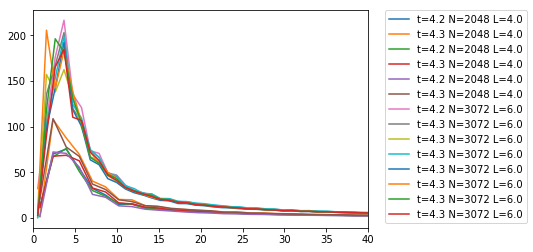

In [94]:
# divide in three sizes 
ps2list = []
ps3list = []
ps4list = []


for s in range(0,len(seldir)):
    mdir = pa.findmdir(seldir[s])
    mfiles = pa.findmfiles(mdir)   
    finalfile = mfiles[-10]
    print(finalfile)
    N = pa.gm(finalfile,'Size')
    L = pa.gm(finalfile,'L')
    ct= pa.gm(finalfile,'ct')
    nsparr = pa.gm(finalfile,'nsp')
    if psparr != None:
        if (N == 2048):
            occnumber = nsparr 
            kmax = len(nmodes2048)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            plt.plot(klist,occnumber,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 3072):
            occnumber = nsparr 
            kmax = len(nmodes3072)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            plt.plot(klist,occnumber,label='t=%.1f N=%d L=%.1f'%(ct,N,L))
        if (N == 4096):
            occnumber = nsparr
            kmax = len(nmodes4096)
            klist  = (0.5+np.arange(kmax))*2*math.pi/L
            plt.plot(klist,occnumber,label='t=%.1f N=%d L=%.1f'%(ct,N,L))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0,40])
plt.show()